# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()
vault_db_path = data_folder / "vault-db.pickle"

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 22,717 vaults in the database and 11,425,880 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Period selection

- Choose the period we want to examine
- Comment out the trim operation if you want to examine the latest data

In [4]:

last_sample_at = prices_df.index[-1]
three_months_ago = last_sample_at - pd.DateOffset(months=3)

PERIOD = [
    three_months_ago,
    last_sample_at,
]

mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[mask]
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Trimmed period contains {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Trimmed period contains 402,753 price rows across all vaults on Arbitrum.


chain                                     address  \
timestamp                                                                
2025-07-06 14:29:19  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 15:29:15  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 16:29:15  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 17:29:15  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2025-07-06 14:29:19     354877121         1.08    242,534.83    224,061.03   
2025-07-06 15:29:15     354891521         1.08    242,535.63    224,061.03   
2025-07-06 16:29:15     354905921         1.08    242,537.44    224,061.97   
2025-07-06 17:29:15     354920321         1.08    242,538.24    224,061.97   

                     performance_fee  management_fee errors  \
timestamp                                                     
2025-07-06 14:29:19              NaN             NaN          
2025-07-06 15:29:15              NaN             NaN          
2025-07-06 16:29:15              NaN             NaN          
2025-07-06 17:29:15              NaN             NaN          

                                                                   id  \
timestamp                                                               
2025-07-06 14:29:19  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 15:29:15  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 16:29:15  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-07-06 17:29:15  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   

                                             name  event_count  \
timestamp                                                        
2025-07-06 14:29:19  Staked EURA (Arbitrum) #1018        75593   
2025-07-06 15:29:15  Staked EURA (Arbitrum) #1018        75593   
2025-07-06 16:29:15  Staked EURA (Arbitrum) #1018        75593   
2025-07-06 17:29:15  Staked EURA (Arbitrum) #1018        75593   

                               protocol  raw_share_price  pct_change_prev  \
timestamp                                                                   
2025-07-06 14:29:19  <unknown ERC-4626>             1.08             0.00   
2025-07-06 15:29:15  <unknown ERC-4626>             1.08             0.00   
2025-07-06 16:29:15  <unknown ERC-4626>             1.08             0.00   
2025-07-06 17:29:15  <unknown ERC-4626>             1.08             0.00   

                     pct_change_next  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2025-07-06 14:29:19             0.00        0.00         1,105,728.22   
2025-07-06 15:29:15             0.00        0.00         1,105,728.22   
2025-07-06 16:29:15             0.00        0.00         1,105,728.22   
2025-07-06 17:29:15             0.00        0.00         1,105,728.22   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2025-07-06 14:29:19              22,114.56               False  
2025-07-06 15:29:15              22,114.56               False  
2025-07-06 16:29:15              22,114.56               False  
2025-07-06 17:29:15              22,114.56               False

## Filter vaults

- Choose vaults on our chain

In [5]:
vault_db
vault_db = {spec: vault for spec, vault in vault_db.items() if spec.chain_id == selected_chain_id}
vault_df = prices_df[prices_df["chain"] == selected_chain_id]

print(f"We have total of {len(vault_db):,} vaults on chain {chain_name}, with {len(vault_df):,} rows.")

We have total of 5,506 vaults on chain Arbitrum, with 402,753 rows.


## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.5,  # 50% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/315 [00:00<?, ?it/s]

Cleaning metrics for 315 vaults
Vault entries with too high NAV values filtered out: 0
Vault entries with too small ATH NAV values filtered out: 84
Vaults abnormally high returns: 7
Vault entries with too few deposit and redeem events (min 25) filtered out: 23
Calculated lifetime metrics for 191 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  cagr  three_months_returns  \
47             ostiumLP             0.07  0.29                  0.04   
115  Plutus Hedge Token             0.07  0.33                  0.07   

     three_months_cagr  three_months_sharpe  one_month_returns  \
47                0.19                 2.34               0.03   
115               0.34                 2.97               0.03   

     one_month_cagr  three_months_volatility denomination     chain  \
47             0.51                     0.00         USDC  Arbitrum   
115            0.42                     0.01         USDC  Arbitrum   

         peak_nav   current_nav  years  mgmt_fee  perf_fee  event_count  \
47  50,971,097.70 28,141,746.86   0.25       NaN       NaN        15781   
115    257,194.27    255,977.55   0.25       NaN       NaN           60   

               protocol                                                id  \
47               Ostium  42161-0x20d419a8e12c45f88fda7c5760bb6923cee27f98   
115  <unknown ERC-4626>  42161-0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a   

             start_date            end_date  
47  2025-09-06 14:13:04 2025-10-06 13:33:15  
115 2025-09-06 14:13:04 2025-10-06 13:33:15

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df.head(50),
    add_index=True,
    add_address=True,
)

# Script output
max_address_dump = 12
print(f"Top {max_address_dump} vaults by 1 month annualised return are: {', '.join(formatted_df.head(max_address_dump)['Name'])}")
print(f"Top {max_address_dump} vaults by 1 month annualised return are: {', '.join(formatted_df.head(max_address_dump)['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 92 vaults.
Top 12 vaults by 1 month annualised return are: ostiumLP, Plutus Hedge Token, Peapods Interest Bearing USDC - 6, FARM_USDC, Peapods Interest Bearing USDC - 25, Curve Vault for crvUSD, Silo Finance Borrowable USDC Deposit in ARB Silo, gmUSDC, USDC-2 yVault, BasisOS USDC-WBTC Hyperliquid, LazyVault_LowerRisk_USDC, Curve Vault for crvUSD
Top 12 vaults by 1 month annualised return are: 0x20d419a8e12c45f88fda7c5760bb6923cee27f98, 0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a, 0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f, 0x2d5fde3d24ed3e7c548a59039eee5af8200f9291, 0xd15a07a4150b0c057912fe883f7ad22b97161591, 0xeba51f6472f4ce1c47668c2474ab8f84b32e1ae7, 0xb739ae19620f7ecb4fb84727f205453aa5bc1ad2, 0x959f3807f0aa7921e18c78b00b2819ba91e52fef, 0x9fa306b1f4a6a83fec98d8ebbabedff78c407f6b, 0xe5fc579f20c2dbffd78a92ddd124871a35519659, 0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58, 0xc8248953429d707c6a2815653eca89846ffaa63b


Name Lifetime return  \
#                                                                       
1                                            ostiumLP           6.50%   
2                                  Plutus Hedge Token           7.42%   
3                   Peapods Interest Bearing USDC - 6           6.23%   
4                                           FARM_USDC           1.88%   
5                  Peapods Interest Bearing USDC - 25           3.31%   
6                              Curve Vault for crvUSD           4.56%   
7    Silo Finance Borrowable USDC Deposit in ARB Silo           3.63%   
8                                              gmUSDC           2.22%   
9                                       USDC-2 yVault           3.02%   
10                      BasisOS USDC-WBTC Hyperliquid           2.74%   
11                           LazyVault_LowerRisk_USDC           1.99%   
12                             Curve Vault for crvUSD           2.55%   
13                          Nashpoint DeFi & RWA Fund           1.73%   
14                            Autopilot USDC Arbitrum           0.87%   
15  Silo Finance Borrowable USDC Deposit, SiloId: 146           1.00%   
16                            Yield Chasing Silo USDC           2.43%   
17                                 Yield Chasing USDC           2.34%   
18                                       Staked USDai           0.59%   
19                               Yield Chasing crvUSD           2.53%   
20                                  Singularity Vault           2.38%   
21                                     Dolomite: USDC           2.11%   
22                                        Savings GYD           2.75%   
23                             Clearstar USDC Reactor           0.67%   
24                                              USDn2           2.57%   
25  Silo Finance Borrowable USDC Deposit, SiloId: 145           0.70%   
26                                   MEV Capital USDC           1.22%   
27                                   Yearn Degen USDC           0.58%   
28                                     Hyperithm USDC           0.66%   
29                                         Saving USX           1.72%   
30                                 Gauntlet USDC Core           0.72%   
31                                 Gains Network USDC           2.51%   
32                         Steakhouse High Yield USDC           0.60%   
33                                        Staked USDX           1.61%   
34                              Steakhouse Prime USDC           0.69%   
35                                          FARM_USDC           1.15%   
36                                      Yearn OG USDC           0.56%   
37                      BasisOS USDC-LINK Hyperliquid           2.56%   
38                          Euler Arbitrum Yield USDC           0.45%   
39                             Curve Vault for crvUSD           1.16%   
40                              K3 Capital USDai USDC           0.54%   
41                                Gauntlet USDC Prime           0.55%   
42                                    Euler Earn USDC           0.41%   
43                          Wrapped Aave Arbitrum GHO           1.12%   
44                                    Fluid Gho Token           0.67%   
45                                   Spark USDC Vault           1.16%   
46                                 Frontier Theo USDC           0.30%   
47                        Wrapped Aave Arbitrum USDCn           1.11%   
48                         Static Aave Arbitrum USDCn           1.11%   
49                       ERC4626-Wrapped Aave v3 USDC           1.11%   
50               Crypto.com Defi Wallet Compound USDC           1.00%   

   Lifetime return ann. 3M return 3M return ann. 3M sharpe 1M return  \
#                                                                      
1                28.76%     4.29%         18.82%       2.3     3.32%   
2                33.29%     7.42%   

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

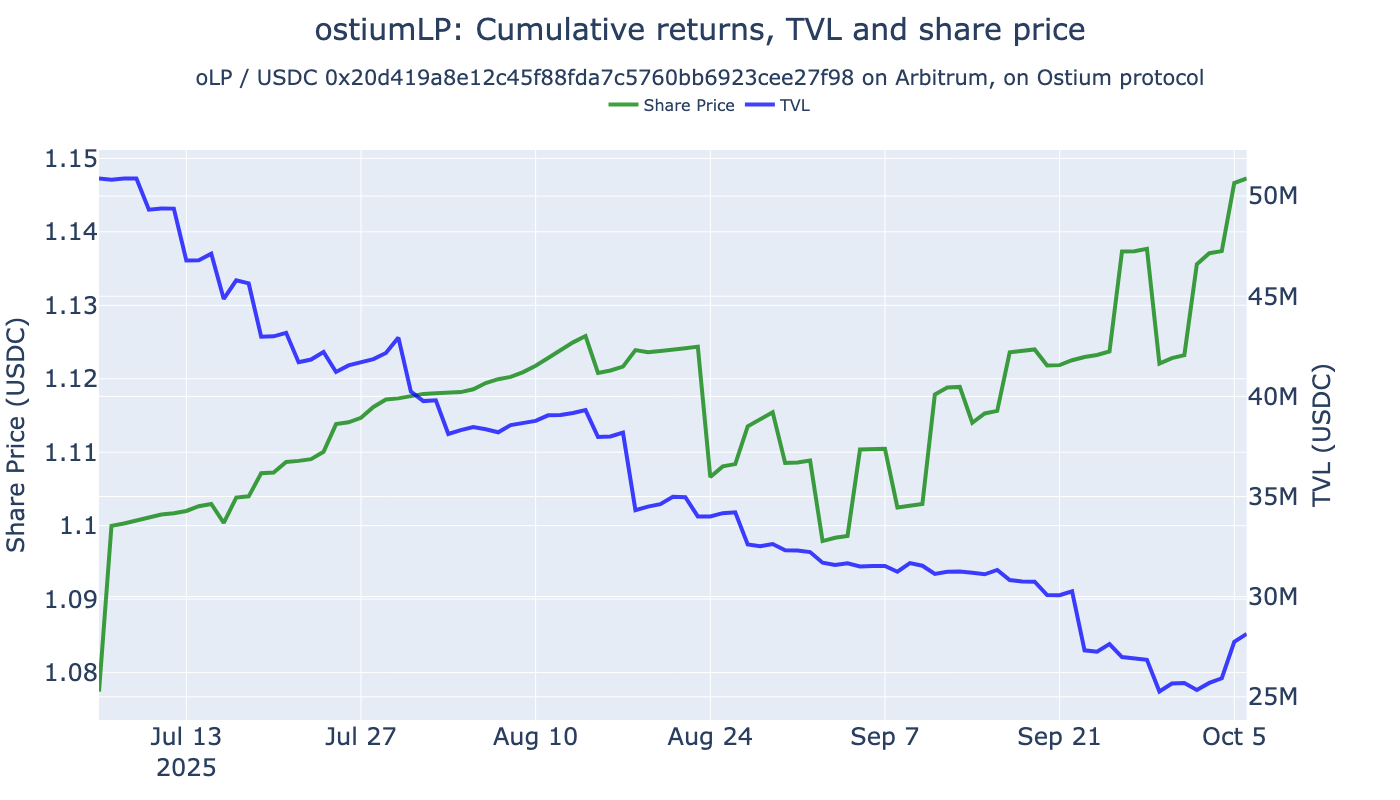

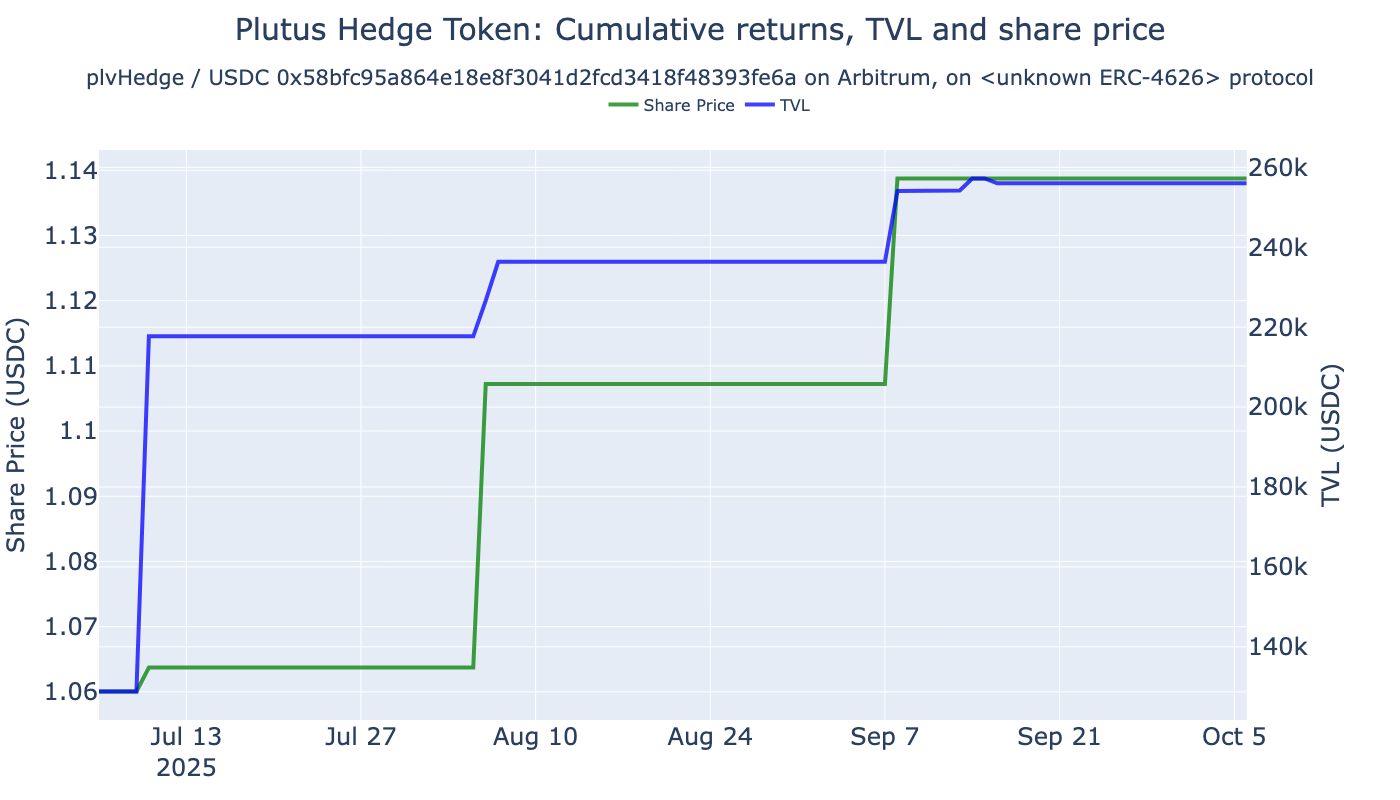

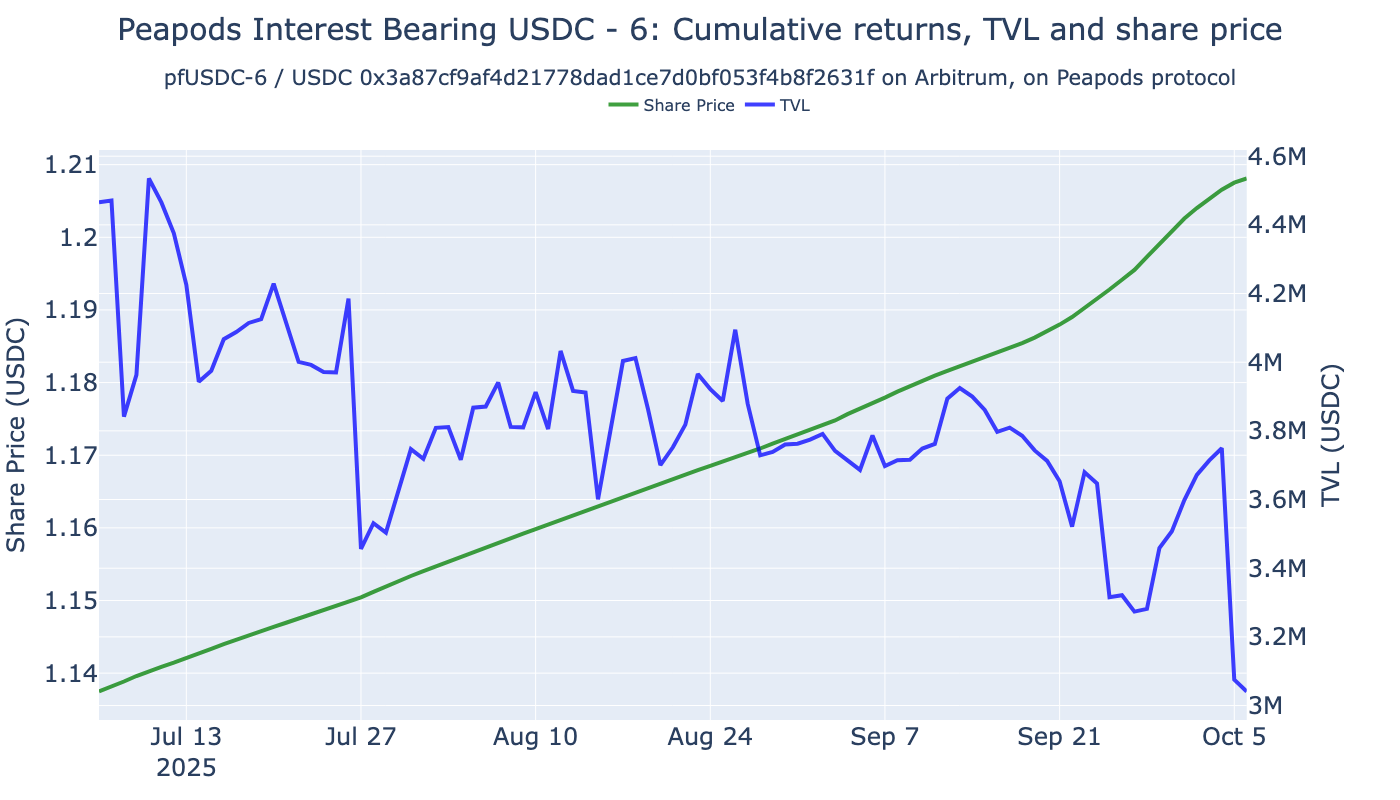

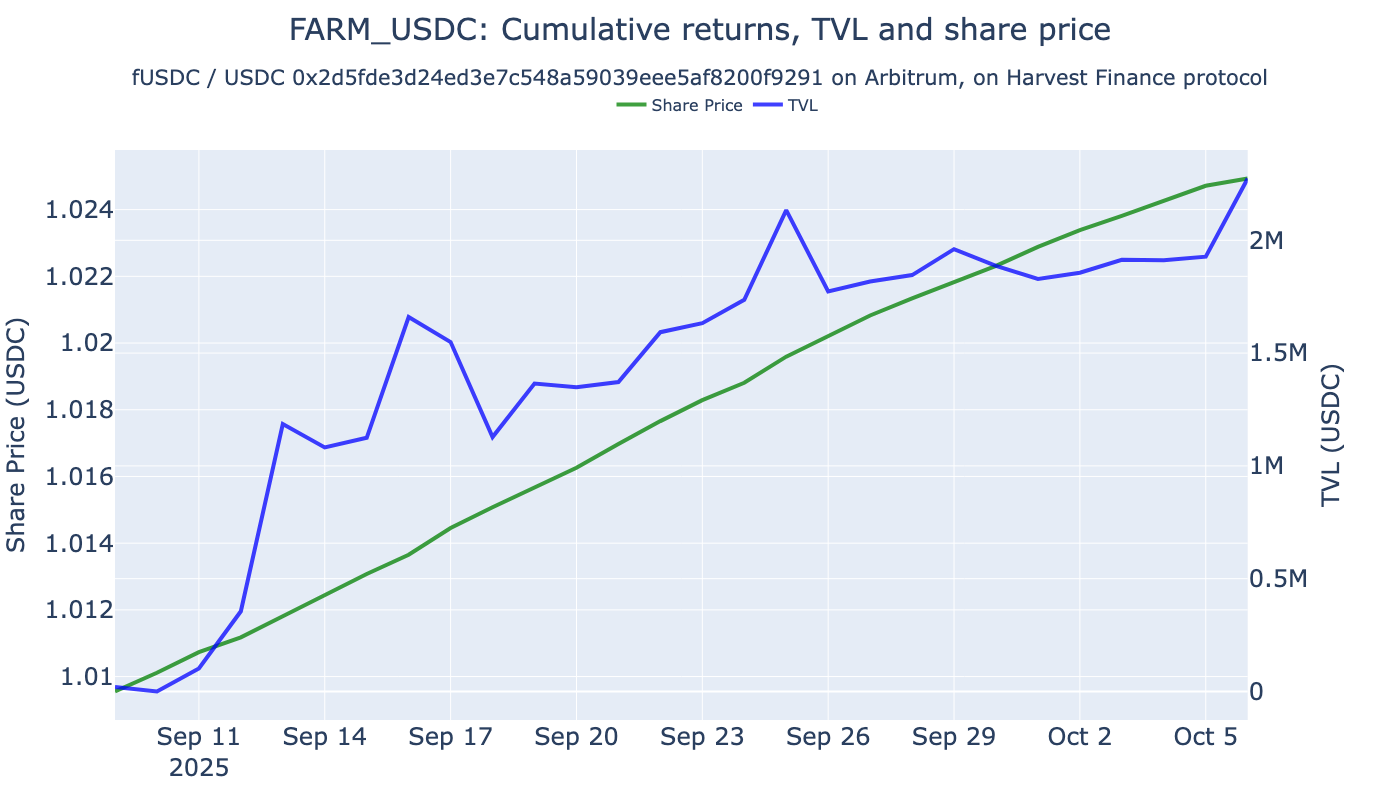

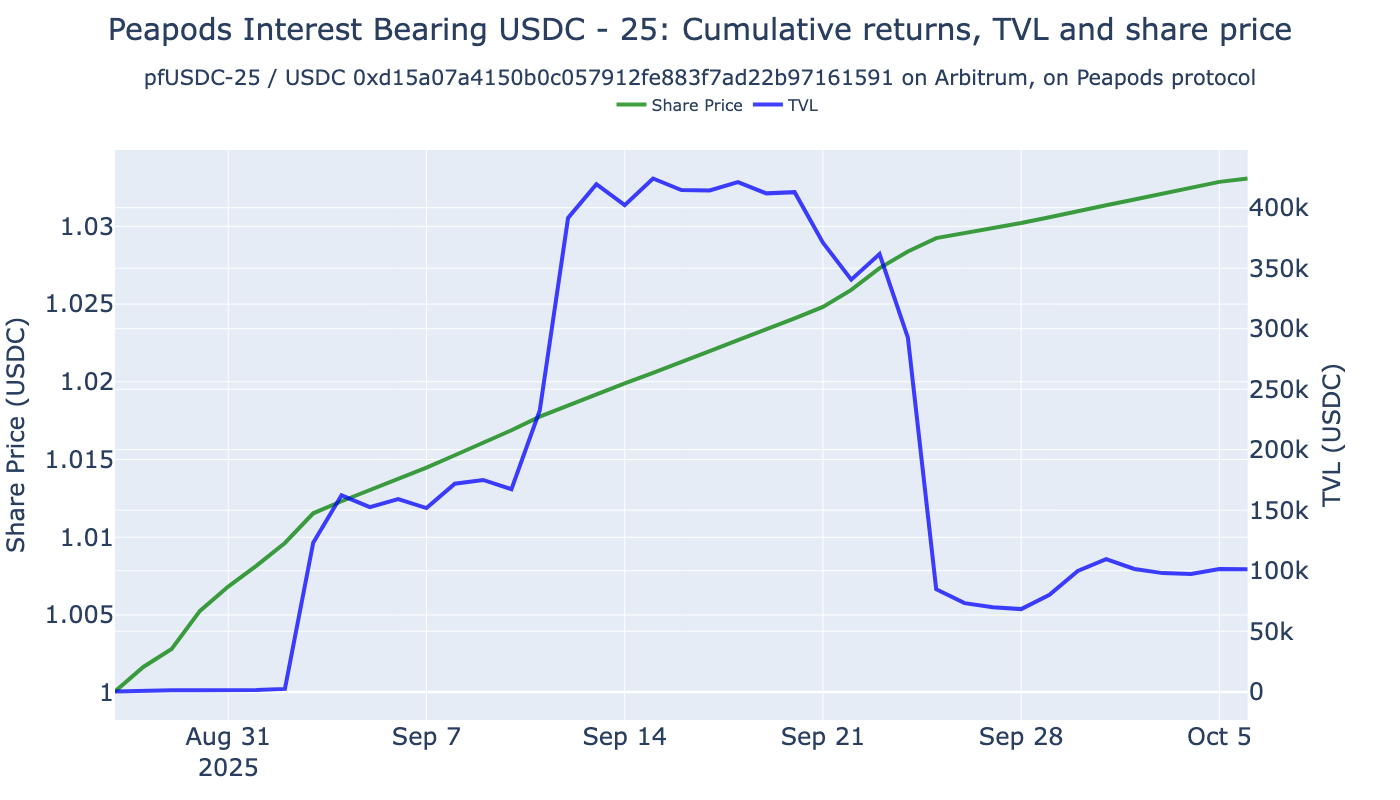

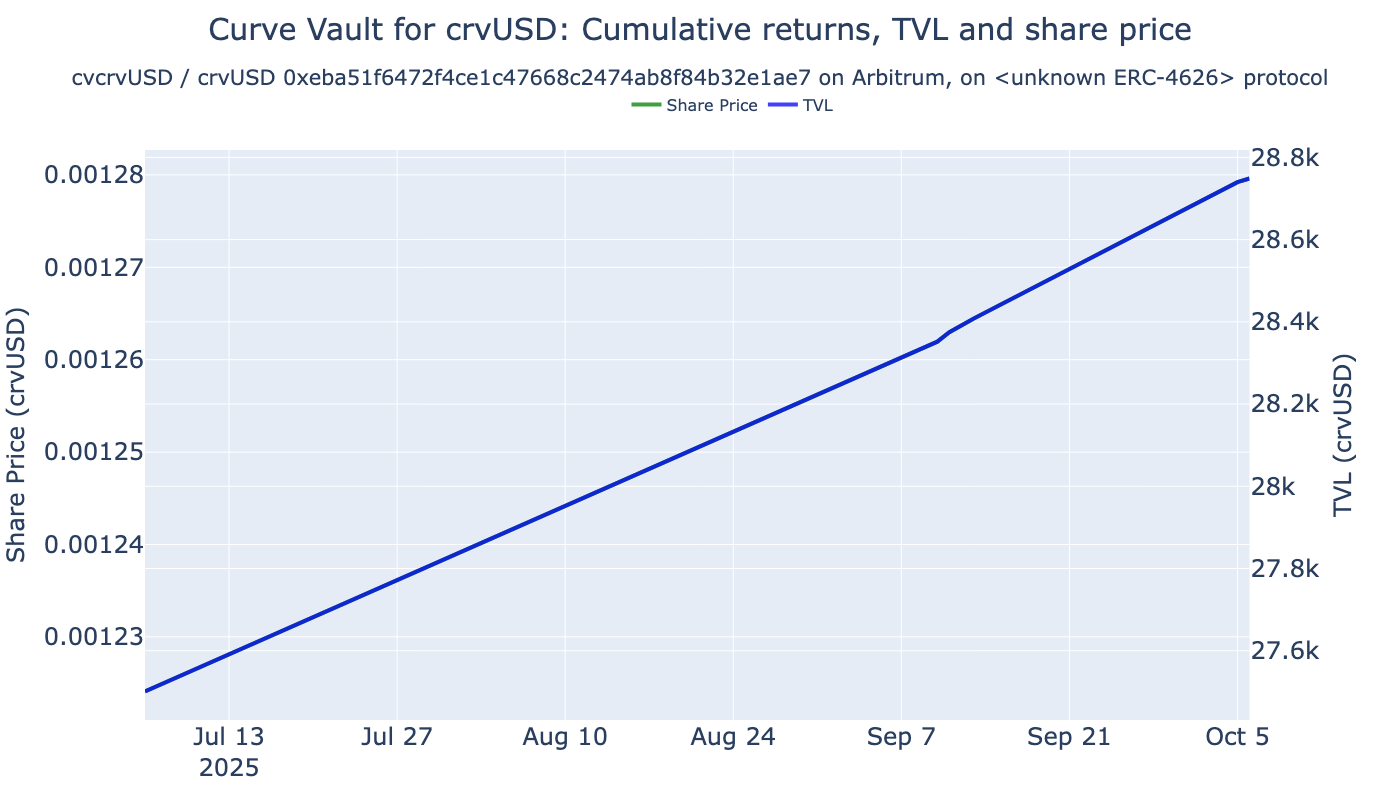

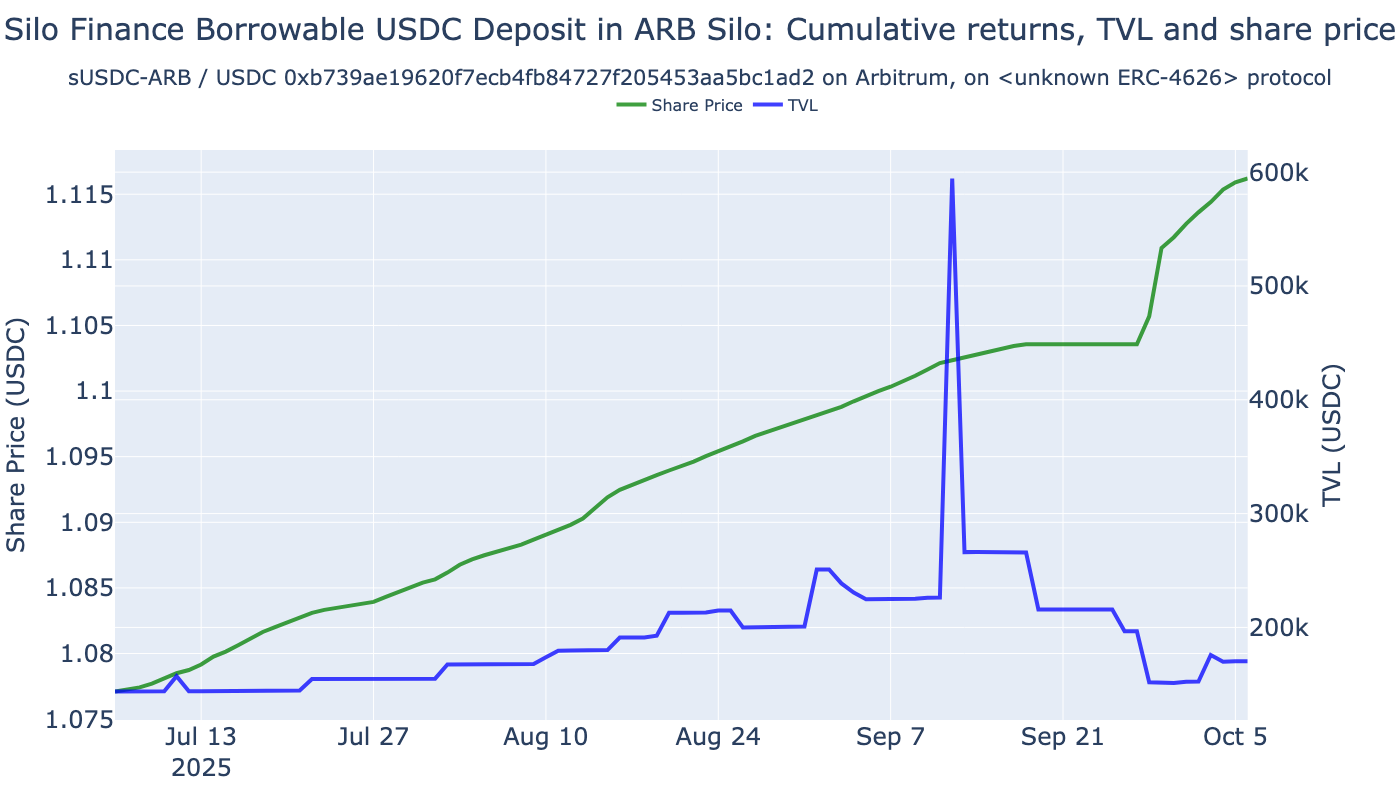

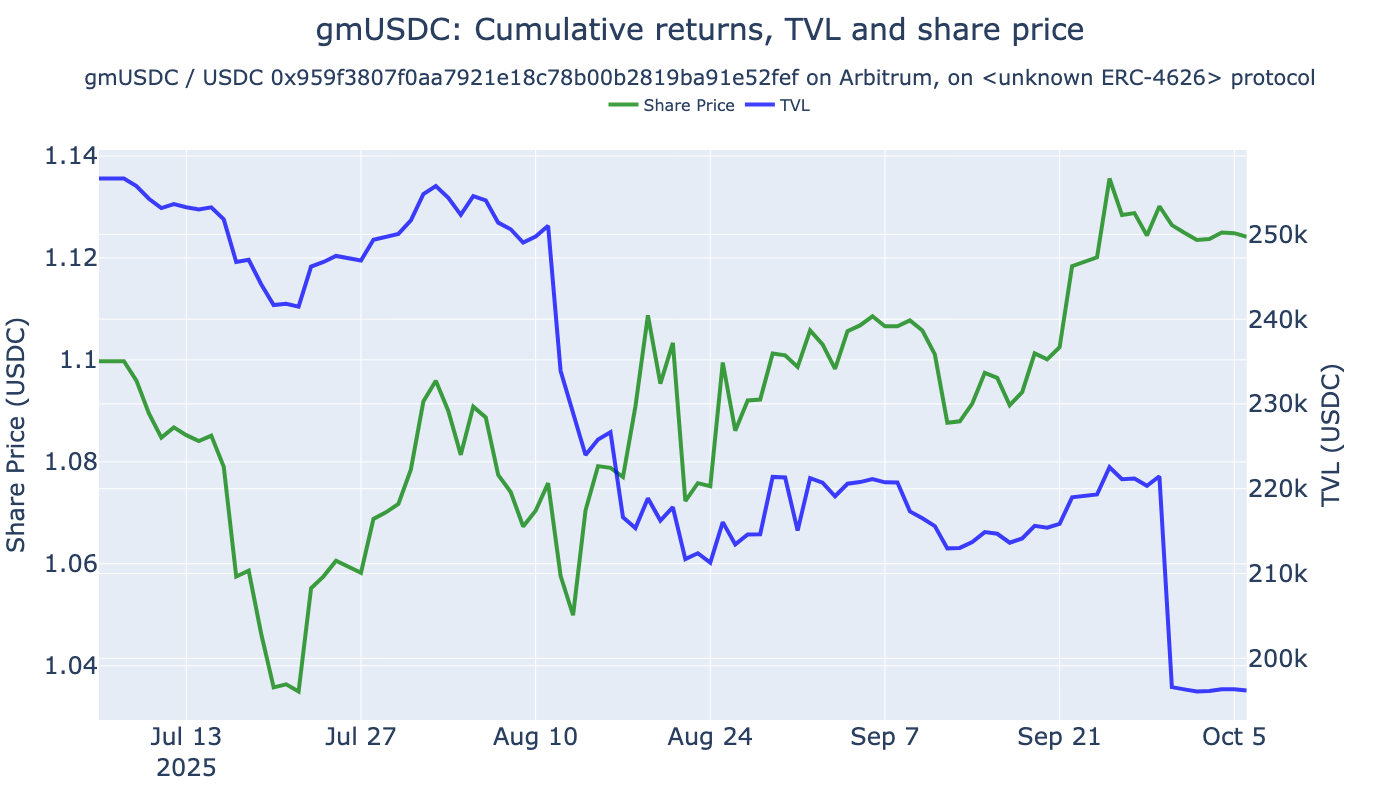

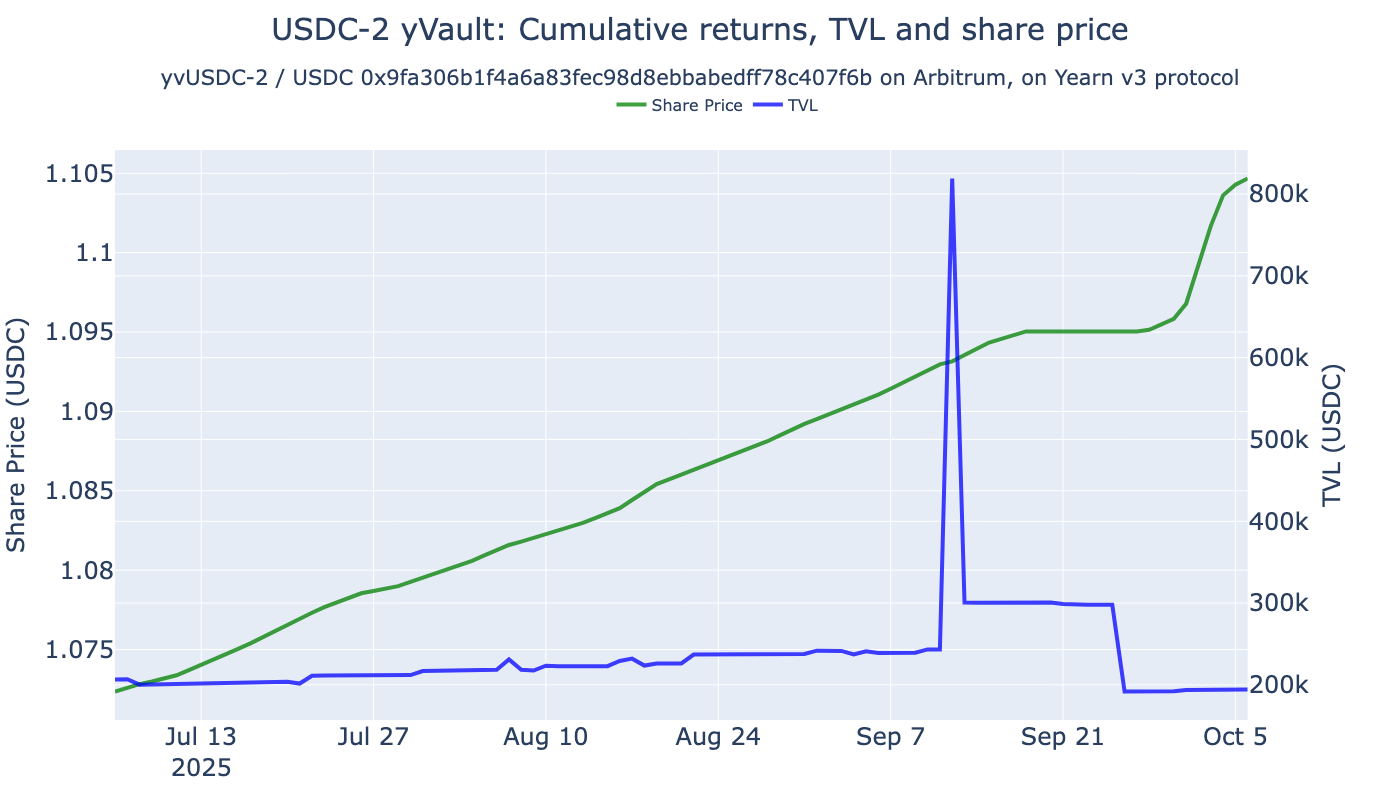

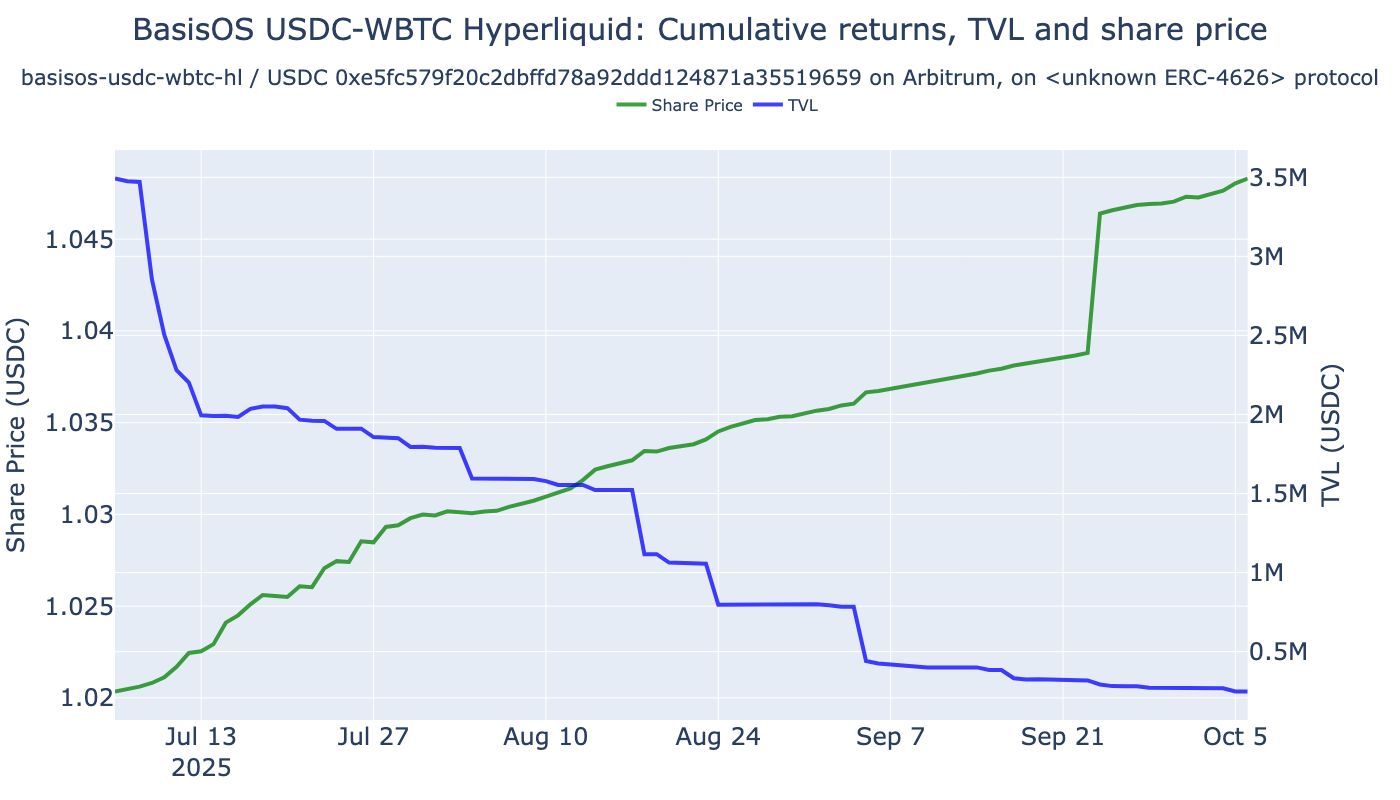

In [8]:
from eth_defi.research.vault_metrics import analyse_vault, format_ffn_performance_stats
from eth_defi.chain import get_chain_name
from eth_defi.research.value_table import format_series_as_multi_column_grid

from tabulate import tabulate
from IPython.display import display, HTML

interest_vault_specs = []

for idx, row in lifetime_data_filtered_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    vault_report = analyse_vault(
        vault_db=vault_db,
        prices_df=prices_df,
        spec=vault_spec,
        chart_frequency="daily",
        logger=lambda x: None,
    )

    chain_name = get_chain_name(vault_spec.chain_id)
    vault_name = vault_report.vault_metadata["Name"]
    display(HTML(f"<h2>Vault {vault_name} ({chain_name}): {vault_spec.vault_address})</h2><br>"))

    # Display returns figur
    returns_chart_fig = vault_report.rolling_returns_chart
    returns_chart_fig.show()

    # Check raw montly share price numbers for each vault
    hourly_price_df = vault_report.hourly_df
    last_price_at = hourly_price_df.index[-1]
    last_price = hourly_price_df["share_price"].asof(last_price_at)
    last_block = hourly_price_df["block_number"].asof(last_price_at)
    month_ago = last_price_at - pd.DateOffset(months=1)
    month_ago_price = hourly_price_df["share_price"].asof(month_ago)
    month_ago_block = hourly_price_df["block_number"].asof(month_ago)

    # Price may be NA if vault is less than month old
    # assert not pd.isna(month_ago_price), f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: no price data for month ago {month_ago} found, last price at {last_price_at} is {last_price}"

    data = {
        "Vault": f"{vault_name} ({chain_name})",
        "Last price at": last_price_at,
        "Last price": last_price,
        "Block last price": f"{month_ago_block:,}",
        "Month ago": month_ago,
        "Block month ago": f"{month_ago_block:,}",
        "Month ago price": month_ago_price,
        "Monthly change %": (last_price - month_ago_price) / month_ago_price * 100,
    }

    df = pd.Series(data)
    # display(df)

    # Display FFN stats
    performance_stats = vault_report.performance_stats
    if performance_stats is not None:
        stats_df = format_ffn_performance_stats(performance_stats)

        multi_column_df = format_series_as_multi_column_grid(stats_df)

        # display(stats_df)
        display(HTML(multi_column_df.to_html(float_format='{:,.2f}'.format, index=True)))
    else:
        print(f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: performance metrics not available, is quantstats library installed?")

## Rolling returns comparison

- Show rolling returns of all picked vaults

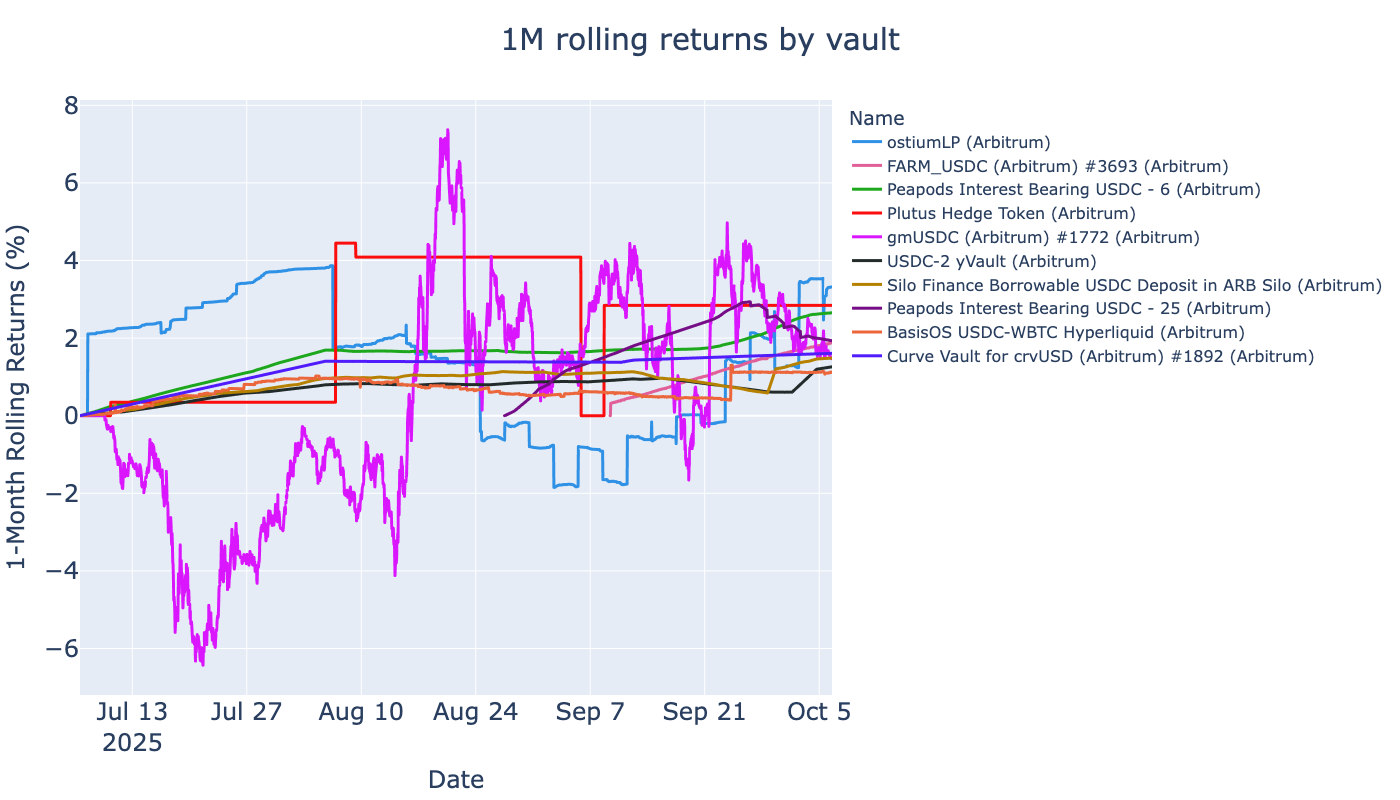

In [9]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()